In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Load data
data = pd.read_csv('state_year_totals_electrci.csv')

# Feature engineering: One-hot encoding for 'State' and scaling for 'Year'
column_transformer = ColumnTransformer(
    [("state_one_hot", OneHotEncoder(), ['State']),
     ("year_scaler", StandardScaler(), ['Year'])],
    remainder='passthrough'
)

# Converting 'Total Vehicles' to a binary target
median_vehicles = data['Total Vehicles'].median()
data['Target'] = (data['Total Vehicles'] > median_vehicles).astype(int)

X = data[['State', 'Year']]
y = data['Target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the logistic regression model with pipeline
log_reg_pipeline = make_pipeline(
    column_transformer,
    LogisticRegression(max_iter=1000, C=0.1)  # Adjusted C for regularization
)

# Training the model
log_reg_pipeline.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8688524590163934
Confusion Matrix:
[[28  5]
 [ 3 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


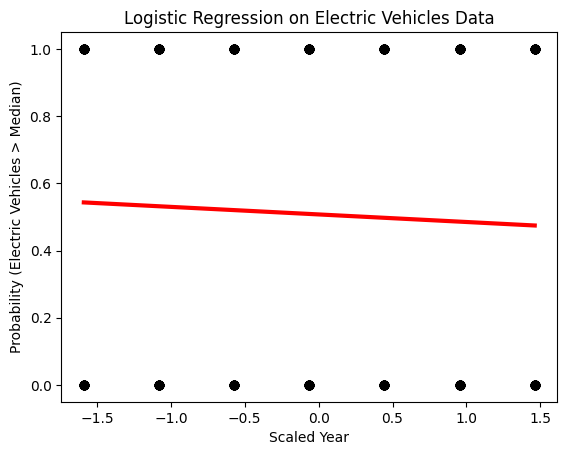

The logistic regression equation is: probability = 1 / (1 + exp(-(-0.090 * year_scaled + 0.030)))
Model accuracy on test data: 0.56


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('state_year_totals_electrci.csv')

# Normalize 'Year'
scaler = StandardScaler()
data['Year_scaled'] = scaler.fit_transform(data[['Year']])

# Converting 'Total Vehicles' to a binary target
median_vehicles = data['Total Vehicles'].median()
data['Target'] = (data['Total Vehicles'] > median_vehicles).astype(int)

# Use only 'Year_scaled' as feature for simplicity in visualization
X = data[['Year_scaled']]
y = data['Target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction for visualization
x_values = np.linspace(X['Year_scaled'].min(), X['Year_scaled'].max(), 300)
y_probs = model.predict_proba(x_values.reshape(-1, 1))[:, 1]  # Probability estimates for class 1

# Visualization of data and regression line
plt.scatter(X['Year_scaled'], y, color='black', zorder=20)  # Data points
plt.plot(x_values, y_probs, color='red', linewidth=3)  # Logistic regression line
plt.xlabel('Scaled Year')
plt.ylabel('Probability (Electric Vehicles > Median)')
plt.title('Logistic Regression on Electric Vehicles Data')
plt.show()

# Example of model equation
coef = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"The logistic regression equation is: probability = 1 / (1 + exp(-({coef:.3f} * year_scaled + {intercept:.3f})))")

# Testing accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data: {accuracy:.2f}")
